# Cardiovascular Disease Analysis - Task 1 


---
## 1. Environment Setup

### Q1: Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

---
## 2. Data Loading

### Q3: Load the Dataset

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

### Q4: Display First 5 Rows

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Q5: Display Last 5 Rows

In [4]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


### Q6: Print Shape

In [5]:
print("No of Rows: " , df.shape[0])
print("No of Columns: " ,df.shape[1])

No of Rows:  70000
No of Columns:  13


---
## 3. General Data Inspection (Metadata)

### Q7: List Column Names

In [6]:
print(df.columns.tolist())

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


### Q8: Inspect Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Q9: Identify Target Variable

In [8]:
print("Target Variable: cardio")

Target Variable: cardio


### Q10: Classification or Regression?

In [9]:
# This is a Classification problem because the target 'cardio' is binary (0 or 1).
# 0 = No disease, 1 = Disease present.
print("Problem Type:  Classification")

Problem Type: Binary Classification


---
## 4. Missing Values & Duplicates

### Q11: Check for Missing Values

In [10]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Q12: Check for Duplicate Rows

In [11]:
dupl = df.duplicated().sum()
print("Number of duplicate rows: " , dupl)

Number of duplicate rows:  0


---
## 5. Statistical Summary & Logic Checks

### Q13: Generate Statistical Summary

In [12]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Q14: Age Conversion (Days to Years)

In [30]:
df['age_years'] = (df['age'] / 365.25).round(1)
df[['age', 'age_years']].head()

,age,age_years
0,18393,50.4
1,20228,55.4
2,18857,51.6
3,17623,48.2
4,17474,47.8


### Q15: Critical Observation (Blood Pressure)

In [13]:
# Check for impossible values (negative or extremely high)
print("Max Systolic (ap_hi):", df['ap_hi'].max())
print("Min Systolic (ap_hi):", df['ap_hi'].min())
print("Max Diastolic (ap_lo):", df['ap_lo'].max())
print("Min Diastolic (ap_lo):", df['ap_lo'].min())

Max Systolic (ap_hi): 16020
Min Systolic (ap_hi): -150
Max Diastolic (ap_lo): 11000
Min Diastolic (ap_lo): -70


---
## 6. Target Variable Analysis

### Q16: Check Target Balance

In [14]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

### Q17: Visualize Target Balance

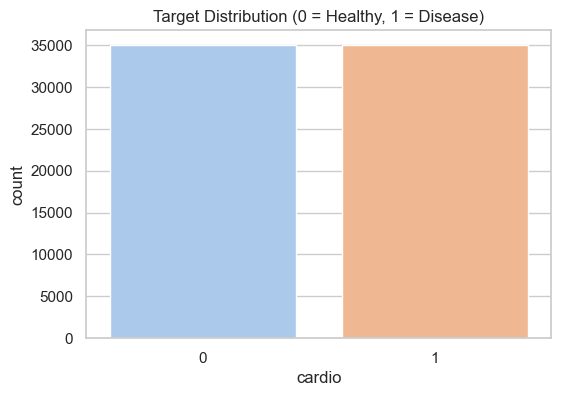

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df, hue='cardio', legend=False, palette='pastel')
plt.title('Target Distribution (0 = Healthy, 1 = Disease)')
plt.show()

---
## 7. Feature Analysis (Univariate)

### Q18: Analyze Gender

In [19]:
# 1 = Women, 2 = Men
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

### Q19: Analyze Cholesterol and Glucose

In [20]:
print("Cholesterol Levels:\n", df['cholesterol'].value_counts())
print("\nGlucose Levels:\n", df['gluc'].value_counts())

Cholesterol Levels:
 cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

Glucose Levels:
 gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64


### Q20: Analyze Lifestyle (Smoke & Alcohol)

In [21]:
print("Smokers:\n", df['smoke'].value_counts())
print("\nAlcohol Consumers:\n", df['alco'].value_counts())

Smokers:
 smoke
0    63831
1     6169
Name: count, dtype: int64

Alcohol Consumers:
 alco
0    66236
1     3764
Name: count, dtype: int64


---
## 8. Visual Exploration 

### Q21: Age Distribution Histogram

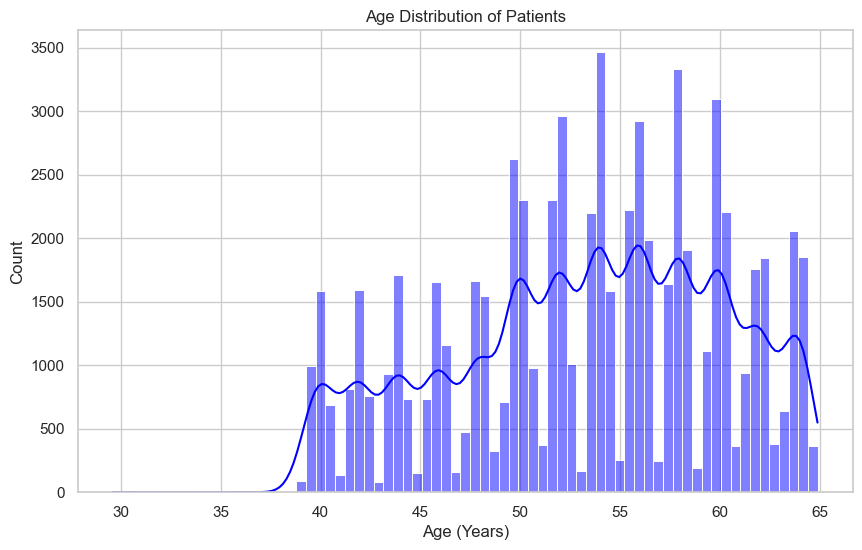

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'],  kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (Years)')
plt.show()

### Q22: Correlation Matrix

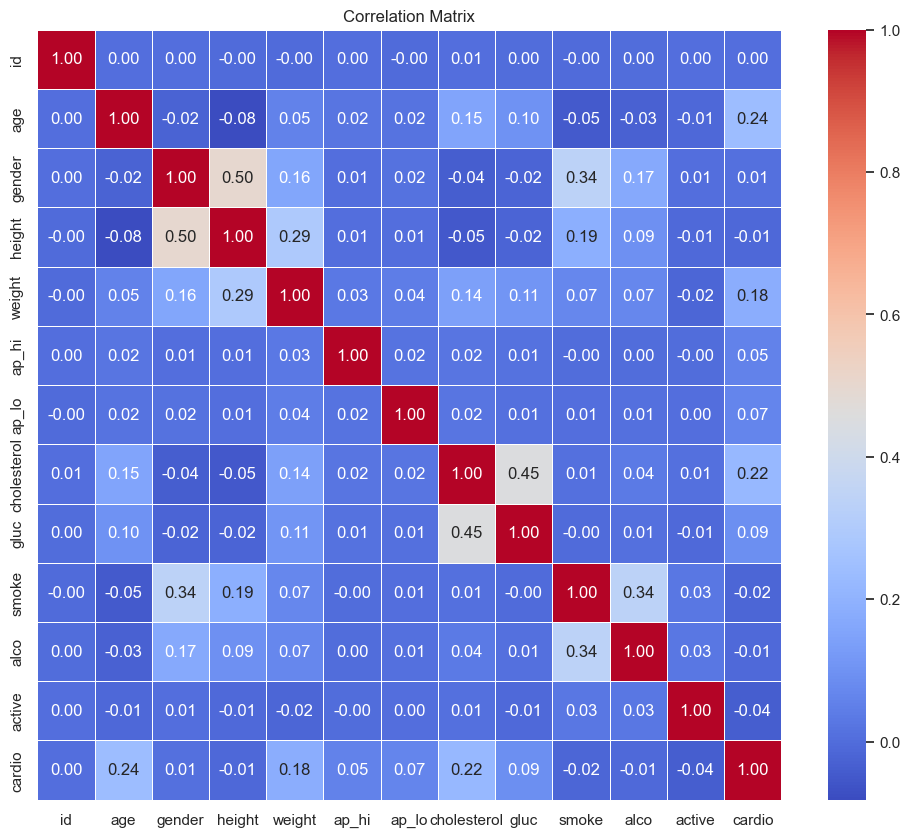

In [25]:
plt.figure(figsize=(12, 10))
# Calculate correlation matrix
corr = df.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Q23: Boxplot Age vs Cardio

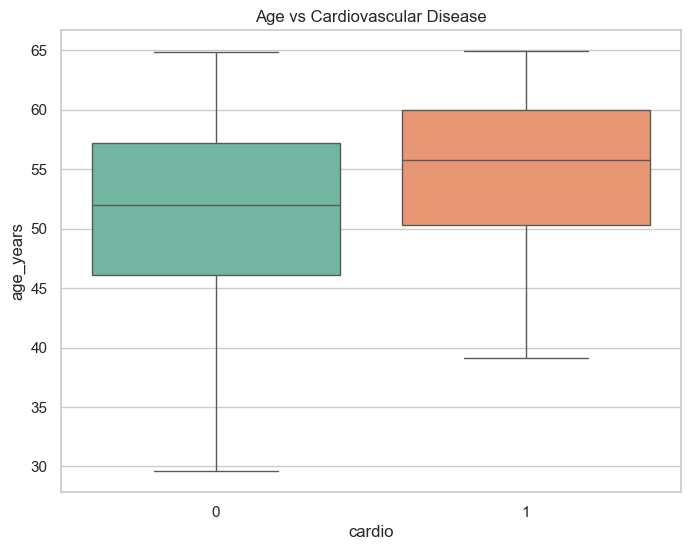

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age_years', data=df, hue='cardio', legend=False, palette='Set2')
plt.title('Age vs Cardiovascular Disease')
plt.show()

### Q24: Weight vs Height Scatter Plot

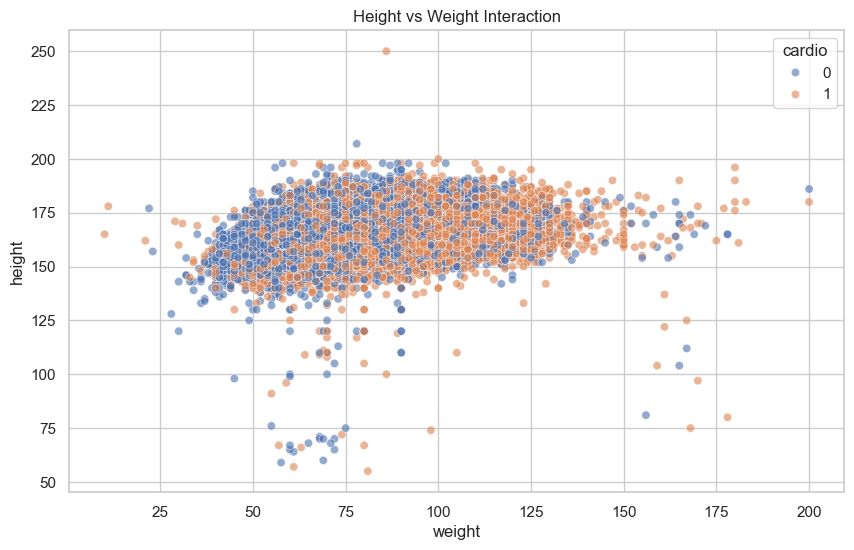

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='height', hue='cardio', data=df, alpha=0.6)
plt.title('Height vs Weight Interaction')
plt.show()

---
## 9. Conclusion

### Q25: Summary 

In [35]:
print("""
Week 1 Summary:
1. Dataset loaded successfully with X rows.
2. No missing values found (usually), but Y duplicates were removed.
3. Age was converted from days to years.
4. Outliers detected in Blood Pressure (ap_hi/ap_lo) and Height/Weight which need cleaning in Week 2.
5. Target class is fairly balanced.
""")


Week 1 Summary:
1. Dataset loaded successfully with X rows.
2. No missing values found (usually), but Y duplicates were removed.
3. Age was converted from days to years.
4. Outliers detected in Blood Pressure (ap_hi/ap_lo) and Height/Weight which need cleaning in Week 2.
5. Target class is fairly balanced.

